In [1]:
# Import packages
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

# Header to set the requests as browser requests
headers = {
    'authority': 'www.amazon.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9,bn;q=0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'
}

# URL of the Amazon Review page
reviews_url = 'https://www.amazon.in/product-reviews/B07JL3W3KG/'

# Define the number of pages
len_page = 10

# Functions

# Extract HTML data from Amazon Review page
def reviewsHtml(url, len_page):
    soups = []

    for page_no in range(1, len_page + 1):
        params = {
            'ie': 'UTF8',
            'reviewerType': 'all_reviews',
            'filterByStar': 'critical',
            'pageNumber': page_no,
        }

        response = requests.get(url, headers=headers, params=params)
        soup = BeautifulSoup(response.text, 'lxml')
        soups.append(soup)

    return soups

# Extract reviews' name, description, date, stars, title from HTML
def getReviews(html_data):
    data_dicts = []

    boxes = html_data.select('div[data-hook="review"]')

    for box in boxes:
        try:
            name = box.select_one('[class="a-profile-name"]').text.strip()
        except Exception as e:
            name = 'N/A'

        try:
            stars = box.select_one('[data-hook="review-star-rating"]').text.strip().split(' out')[0]
        except Exception as e:
            stars = 'N/A'

        try:
            title = box.select_one('[data-hook="review-title"]').text.strip()
        except Exception as e:
            title = 'N/A'

        try:
            datetime_str = box.select_one('[data-hook="review-date"]').text.strip().split(' on ')[-1]
            date = datetime.strptime(datetime_str, '%B %d, %Y').strftime("%d/%m/%Y")
        except Exception as e:
            date = 'N/A'

        try:
            description = box.select_one('[data-hook="review-body"]').text.strip()
        except Exception as e:
            description = 'N/A'

        data_dict = {
            'Name' : name,
            'Stars' : stars,
            'Title' : title,
            'Date' : date,
            'Description' : description
        }

        data_dicts.append(data_dict)

    return data_dicts

# Data Process

html_datas = reviewsHtml(reviews_url, len_page)
reviews = []

for html_data in html_datas:
    review = getReviews(html_data)
    reviews += review

df_reviews = pd.DataFrame(reviews)
print(df_reviews)

# Save data
# df_reviews.to_csv('reviews.csv', index=False)


               Name Stars                                              Title  \
0         Mayank K.   1.0                 1.0 out of 5 stars\nCharging issue   
1            Akshay   3.0          3.0 out of 5 stars\nPathetic battery life   
2           Prateek   3.0                      3.0 out of 5 stars\nExpensive   
3    Rohith Vardhan   3.0                       3.0 out of 5 stars\nCharging   
4             Parth   2.0  2.0 out of 5 stars\nOnly spins in single direc...   
..              ...   ...                                                ...   
95  BALJINDER SINGH   3.0                   3.0 out of 5 stars\nGood product   
96  satyanandarowlo   1.0                    1.0 out of 5 stars\nFaulty item   
97    Chayanika Roy   1.0       1.0 out of 5 stars\nQuality has deteriorated   
98           Rakesh   1.0                   1.0 out of 5 stars\nNot charging   
99               SA   1.0  1.0 out of 5 stars\nWorst Product! Dead after ...   

   Date                                

In [2]:
 

import re

df= df_reviews
def extract_text_after_stars(text):
    match = re.search(r'(?<=stars\s).*', text)
    return match.group(0).strip() if match else text

# Apply the function to the 'Title' column
df['Title'] = df['Title'].apply(extract_text_after_stars)

 

# cleaning the (Title , Description)

In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK stopwords (you need to run this line only once)
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
 
# Function to clean and preprocess text
def clean_text(text):
    # Ensure text is a string
    text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the cleaning function to 'Title' and 'Description' columns
df['Title'] = df['Title'].apply(clean_text)
df['Description'] = df['Description'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# give sentiment 

In [7]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 330.3 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/626.3 kB 563.7 kB/s eta 0:00:01
   ------------------ --------------------- 286.7/626.3 kB 1.8 MB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
import pandas as pd
from textblob import TextBlob

# Assuming you have a dataset named 'your_dataset' with columns: Name, Stars, Title, Date, Description
 
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Applying the sentiment analysis function to the 'Title' and 'Description' columns
df['Title_Sentiment'] = df['Title'].apply(get_sentiment)
df['Description_Sentiment'] = df['Description'].apply(get_sentiment)

# Creating a new column for sentiment labels based on polarity
df['Title_Sentiment_Label'] = df['Title_Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
df['Description_Sentiment_Label'] = df['Description_Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

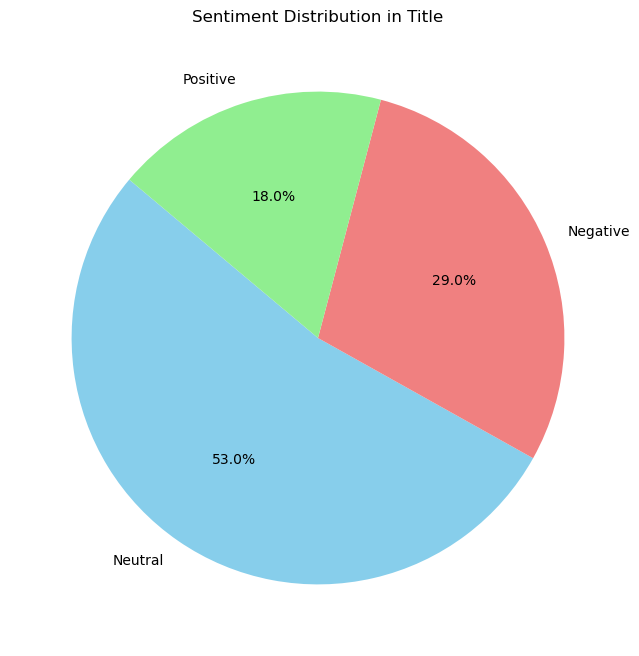

In [10]:
import matplotlib.pyplot as plt

# Assuming you have a dataset named 'your_dataset' with Title_Sentiment_Label column

# Count the number of occurrences for each sentiment label
sentiment_counts = df['Title_Sentiment_Label'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution in Title')
plt.show()

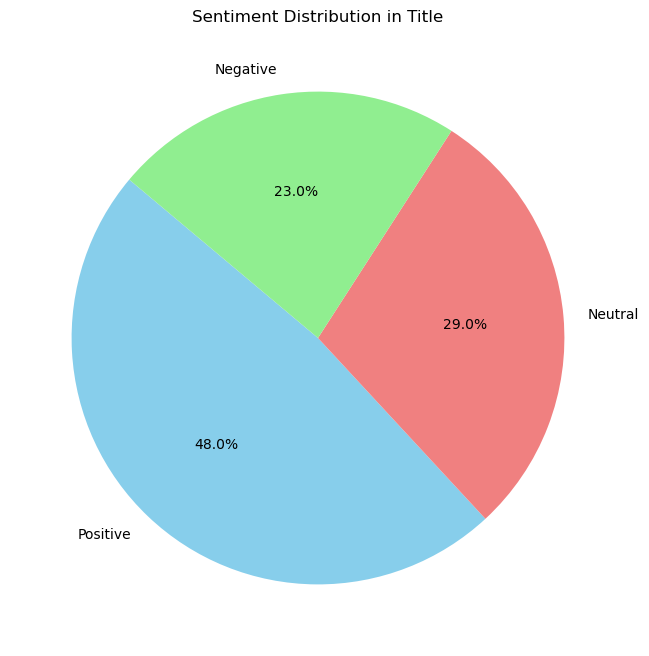

In [12]:
# Count the number of occurrences for each sentiment label
sentiment_counts = df['Description_Sentiment_Label'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution in Title')
plt.show()

In [13]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.8 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'working'),
  Text(1, 0, 'product'),
  Text(2, 0, 'battery'),
  Text(3, 0, 'stopped'),
  Text(4, 0, 'charging'),
  Text(5, 0, 'good'),
  Text(6, 0, 'months'),
  Text(7, 0, 'poor'),
  Text(8, 0, 'bad'),
  Text(9, 0, 'life')])

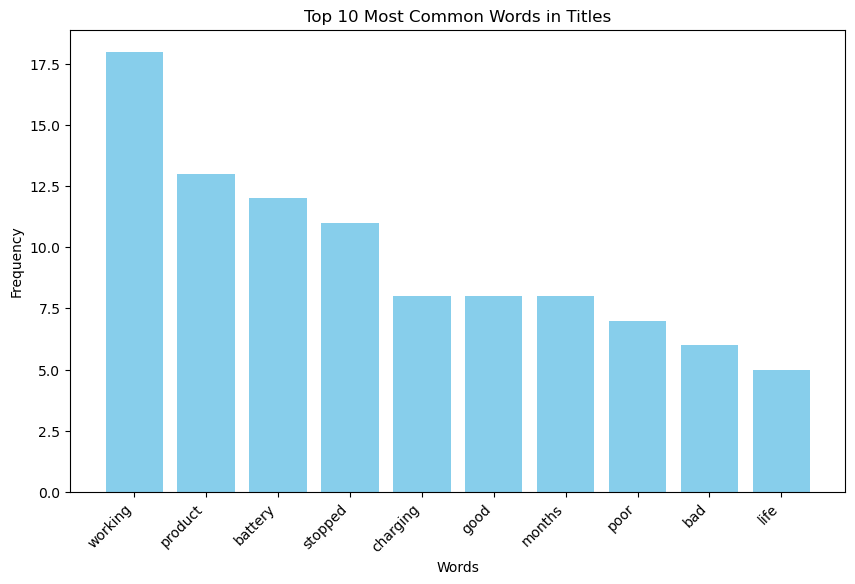

In [14]:

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a dataset named 'your_dataset' with a 'Title' column

# Combine all titles into a single string
all_titles = ' '.join(df['Title'].astype(str))

# Use Counter to count the occurrences of each word
word_counts = Counter(all_titles.split())

# Extract the most common words and their frequencies
top_words = word_counts.most_common(10)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [count[1] for count in top_words], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Titles')
plt.xticks(rotation=45, ha='right')  # Rotate

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'working'),
  Text(1, 0, 'battery'),
  Text(2, 0, 'charging'),
  Text(3, 0, 'brush'),
  Text(4, 0, 'product'),
  Text(5, 0, 'stopped'),
  Text(6, 0, 'good'),
  Text(7, 0, 'charger'),
  Text(8, 0, 'indicator'),
  Text(9, 0, 'charge')])

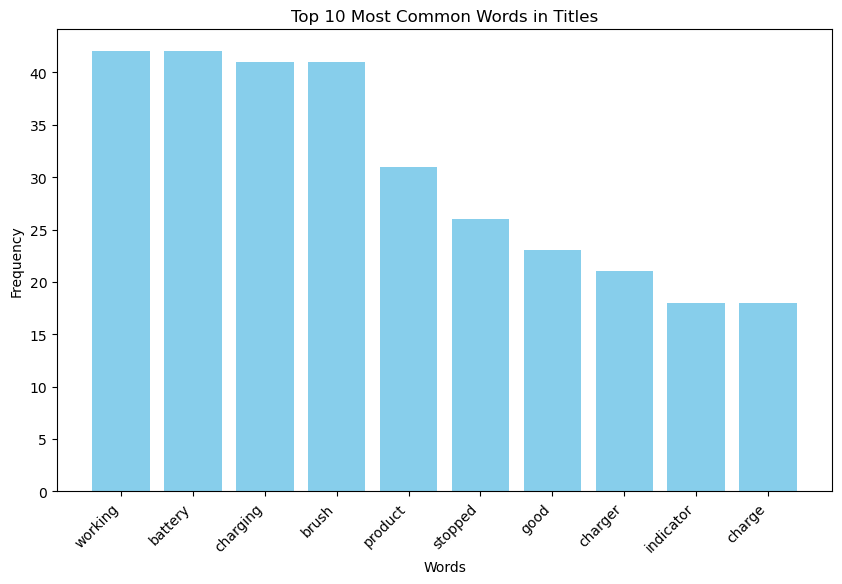

In [15]:
 
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a dataset named 'df' with a 'Title' column

# Combine all titles into a single string
all_titles = ' '.join(df['Description'].astype(str))

# Use Counter to count the occurrences of each word
word_counts = Counter(all_titles.split())

# Extract the most common words and their frequencies
top_words = word_counts.most_common(10)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [count[1] for count in top_words], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Titles')
plt.xticks(rotation=45, ha='right')  # Rotate

In [16]:
!pip install gensim

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [17]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Tokenize the combined text column, ensuring all inputs are strings
tokenized_text = [word_tokenize(str(doc)) for doc in df['Title'] + ' ' + df['Description']]

# Create a Dictionary from the articles: dictionary
dictionary = corpora.Dictionary(tokenized_text)

# Create a Corpus: corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Fit the LDA model on the corpus
lda_model = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)

# Print the 5 topics with their 10 most significant words
topics = lda_model.print_topics(num_words=10)
topics

[(0,
  '0.035*"battery" + 0.027*"charging" + 0.020*"good" + 0.019*"working" + 0.018*"brush" + 0.015*"stopped" + 0.012*"product" + 0.010*"indicator" + 0.010*"use" + 0.010*"months"'),
 (1,
  '0.049*"working" + 0.027*"stopped" + 0.022*"brush" + 0.013*"product" + 0.013*"months" + 0.012*"use" + 0.011*"one" + 0.010*"charging" + 0.009*"days" + 0.009*"b"'),
 (2,
  '0.021*"product" + 0.018*"charging" + 0.016*"time" + 0.012*"working" + 0.011*"month" + 0.010*"charged" + 0.010*"poor" + 0.009*"brush" + 0.009*"b" + 0.008*"amazon"'),
 (3,
  '0.030*"product" + 0.022*"charger" + 0.016*"working" + 0.016*"brush" + 0.014*"charging" + 0.014*"b" + 0.014*"oral" + 0.013*"toothbrush" + 0.010*"item" + 0.009*"device"'),
 (4,
  '0.036*"battery" + 0.018*"good" + 0.016*"indicator" + 0.014*"better" + 0.014*"charging" + 0.014*"charge" + 0.014*"one" + 0.012*"brush" + 0.010*"poor" + 0.010*"life"')]

In [19]:
!pip install pyLDAvis

  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
    --------------------------------------- 0.0/2.6 MB 653.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.6 MB 1.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.6 MB 2.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.6 MB 3.5 MB/s eta 0:00:01
   ------------------ --------------------- 1.2/2.6 MB 5.1 MB/s eta 0:00:01
   ------------------ --------------------- 1.2/2.6 MB 5.1 MB/s eta 0:00:01
   ---

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [20]:

import pyLDAvis.gensim_models
from gensim.models.ldamodel import LdaModel
from gensim import corpora

# Assuming 'lda_model', 'corpus', and 'dictionary' are already defined in your code
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Save the visualization to an HTML file
pyLDAvis.display(lda_vis)